In [43]:
import sys
import glob
import re
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

from wcte.brbtools import sort_run_files, get_part_files, select_good_parts, get_files_from_part
# from wcte.brbtools import create_big_df, df_extend
from wcte.brbtools import df_extend, create_df_from_file, full_df_mPMT
from wcte.mapping  import id_names

import numpy             as np
import awkward           as ak
import matplotlib.pyplot as plt
import pandas            as pd
import hipy.pltext       as pltext
import hipy.utils        as ut
import hipy.cfit         as cfit
import hipy.efit         as efit
import hipy.histos       as histos

from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

pltext.style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
run = 1444
map = id_names

run_files  = sort_run_files(f"/eos/experiment/wcte/data/2025_commissioning/offline_data/{run}/WCTE_offline_R{run}S*P*.root")
part_files = get_part_files(run_files)

In [4]:
good_parts = select_good_parts(part_files, run_files)
part = 0
files = get_files_from_part(good_parts[part], run_files)

Selecting Good Parts: 100%|██████████| 324/324 [00:05<00:00, 58.67it/s]


In [5]:
file_hit_card_ids    = files[0]
file_hit_channel_ids = files[1]
file_hit_charges     = files[2]
file_hit_times       = files[3]
file_window_times    = files[4]
file_event_number    = files[5]


In [6]:
file_hit_card_ids

<Array [[87, 87, 87, 87, ..., 130, 130, 130], ...] type='530 * var * int32'>

In [7]:
df = create_df_from_file(files)
df

,evt,card,channel,charge,time
0,0,87,11,75.0,2080.676880
1,0,87,12,149.0,2087.733765
2,0,87,10,149.0,2090.839600
3,0,87,4,74.0,2101.392334
4,0,87,11,151.0,4100.148071
...,...,...,...,...,...
413035,529,130,15,1242.0,2484.462158
413036,529,130,16,61.0,2487.570557
413037,529,130,13,619.0,2491.684082
413038,529,130,16,43.0,2839.679932


In [8]:
mask_out_beam = (~df["card"].isin([130,131,132]))
df_mpmt = df[mask_out_beam]
df_mpmt

,evt,card,channel,charge,time
0,0,87,11,75.0,2080.676880
1,0,87,12,149.0,2087.733765
2,0,87,10,149.0,2090.839600
3,0,87,4,74.0,2101.392334
4,0,87,11,151.0,4100.148071
...,...,...,...,...,...
413003,529,43,15,111.0,823.487549
413004,529,43,16,139.0,821.447144
413005,529,43,17,232.0,826.268799
413006,529,43,18,179.0,823.141357


83


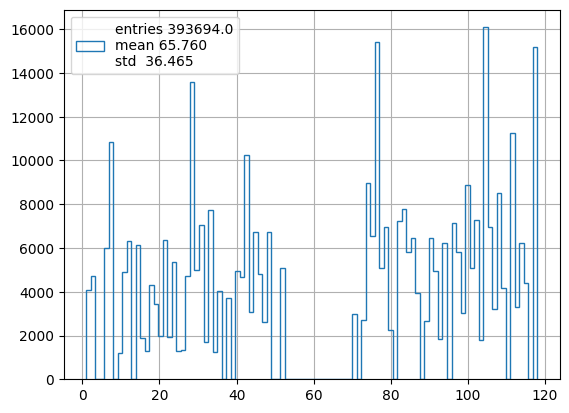

In [9]:
pltext.hist(df_mpmt["card"], 100);
print(len(np.unique(df_mpmt["card"])))

In [10]:
df_concat = full_df_mPMT(good_parts, run_files)

Creating DataFrames For Each Part: 100%|██████████| 265/265 [01:09<00:00,  3.82it/s]


In [11]:
mask_out_beam = (~df_concat["card"].isin([130,131,132]))
df_concat = df_concat[mask_out_beam]

In [12]:
df_concat

,evt,card,channel,charge,time
0,0,87,11,75.0,2080.676880
1,0,87,12,149.0,2087.733765
2,0,87,10,149.0,2090.839600
3,0,87,4,74.0,2101.392334
4,0,87,11,151.0,4100.148071
...,...,...,...,...,...
143620687,186353,43,13,470.0,2154.882935
143620688,186353,43,14,177.0,2158.343018
143620689,186353,43,15,153.0,2154.641357
143620690,186353,43,17,621.0,2155.013306


In [13]:
cards = df_concat["card"]

83


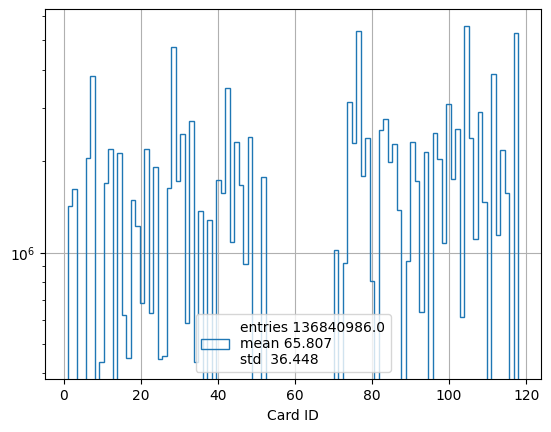

In [14]:
pltext.hist(cards, 100, ylog=True, xylabels=("Card ID"));
print(len(np.unique(df_concat["card"])))

In [15]:
charges_per_event = df_concat.groupby("evt")["charge"].mean()
times_per_event   = df_concat.groupby("evt")["time"].mean()

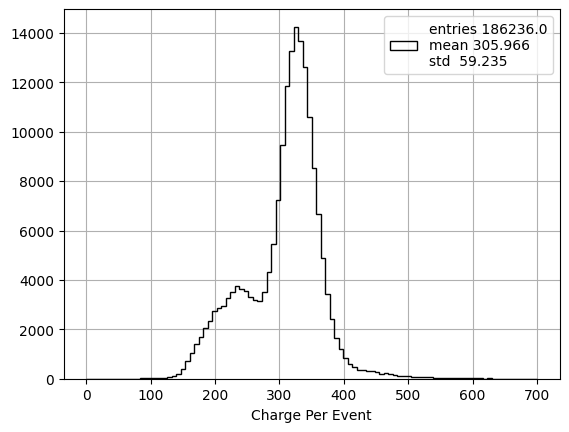

In [44]:
pltext.hist(charges_per_event, 100, ylog=False, xylabels=("Charge Per Event"), range=(0, 700));

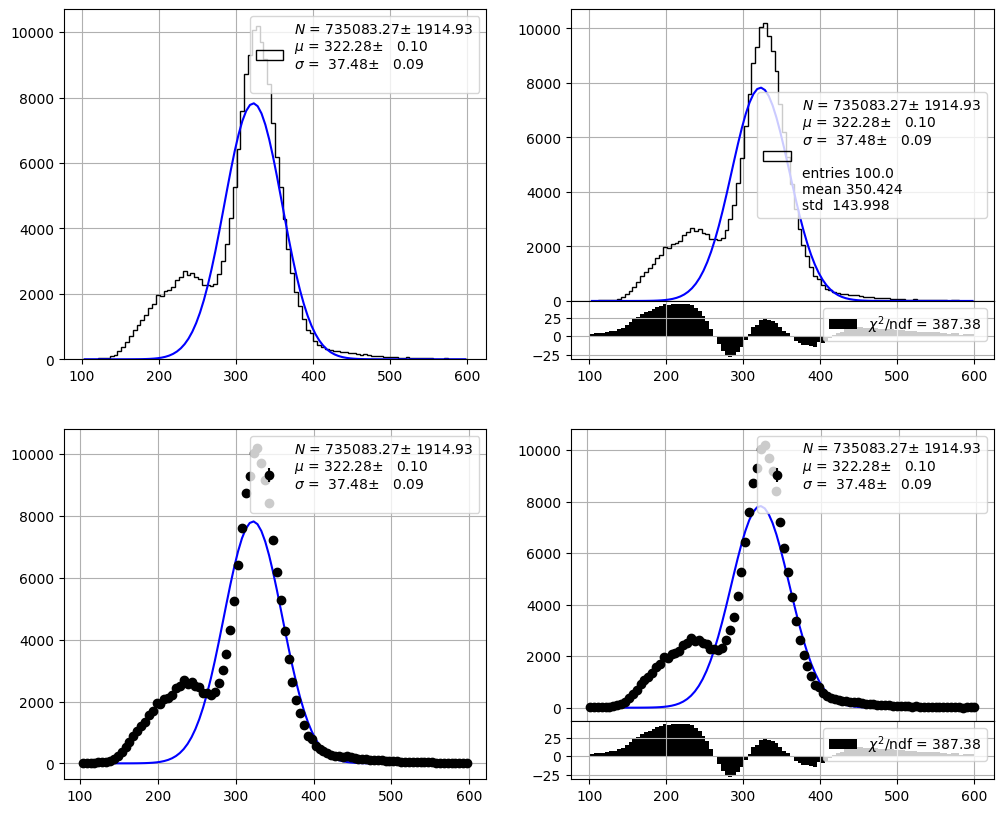

In [47]:
mask = (np.array(charges_per_event) > 100) & (np.array(charges_per_event) < 600)

subplot = pltext.canvas(4)

subplot(1)
pltext.hfit(charges_per_event[mask], 100, "gaus");
subplot(2)
pltext.hfit(charges_per_event[mask], 100, "gaus", stats=True, residuals = True);
subplot(3)
pltext.hfit(charges_per_event[mask], 100, "gaus", mode="plot");
subplot(4)
pltext.hfit(charges_per_event[mask], 100, "gaus", mode="plot", residuals=True);



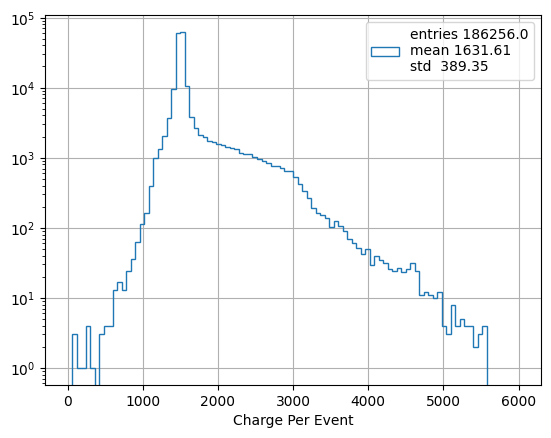

In [28]:
pltext.hist(times_per_event, 100, ylog=True, xylabels=("Charge Per Event"), range=(0, 6000), formate = '.2f');